### Initialize the environment

In [1]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
src_dir='../src' # source directory
run_dir='../MDBN_run' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [3]:
import sys
sys.path.insert(0, src_dir)
import rbm
import MDBN
import AMLsm

### Load the experiment results

In [4]:
date_time='2017-01-14_2113' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run='7'
runfile='AML_Batch_'+date_time+'/Exp_'+date_time+'_run_'+run+'.npz' # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

Adding a layer with 559 input and 40 outputs
Gaussian Layer 0 True
Adding a layer with 19937 input and 400 outputs
Gaussian Layer 0 True
Adding a layer with 400 input and 40 outputs
Bernoullian Layer 1
Adding a layer with 1686 input and 200 outputs
Gaussian Layer 0 True
Adding a layer with 200 input and 20 outputs
Bernoullian Layer 1
Adding a layer with 100 input and 24 outputs
Bernoullian Layer 0
Adding a layer with 24 input and 3 outputs
Bernoullian Layer 1


### Load the data

In [5]:
datafiles = AMLsm.prepare_AML_TCGA_datafiles(config)

#### Compute the joint layer components

In [6]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

(-0.5, 99.5, 169.5, -0.5)

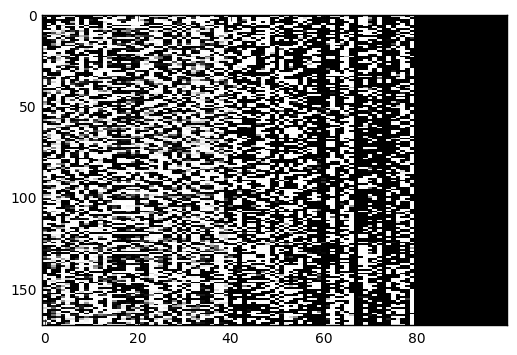

In [7]:
joint_layer = np.hstack(dbn_output_list[:2]+[np.zeros(dbn_output_list[2].shape,dtype=theano.config.floatX)])
plt.imshow(joint_layer, cmap='gray',interpolation='none')
plt.axis('tight')

([array([ 85.,   5.,   3.,   1.,   2.,   3.,   4.,   3.,   1.,  63.]),
  array([ 84.,   7.,   6.,   0.,   2.,   1.,   0.,   4.,   3.,  63.]),
  array([ 61.,   4.,   3.,   6.,   1.,   3.,   4.,   5.,   6.,  77.]),
  array([ 49.,   5.,   5.,   1.,   3.,   4.,   2.,   2.,  11.,  88.]),
  array([ 82.,   4.,   2.,   1.,   4.,   4.,   2.,   5.,   3.,  63.]),
  array([ 68.,   8.,   2.,   3.,   0.,   1.,   2.,   3.,   9.,  74.]),
  array([ 89.,   5.,   5.,   1.,   0.,   1.,   2.,   1.,   2.,  64.]),
  array([ 81.,   7.,   4.,   1.,   1.,   1.,   2.,   2.,   6.,  65.]),
  array([ 65.,   1.,   2.,   0.,   2.,   2.,   1.,   8.,   5.,  84.]),
  array([ 79.,  10.,   1.,   3.,   1.,   5.,   0.,   2.,   5.,  64.]),
  array([ 63.,   5.,   0.,   2.,   2.,   0.,   0.,   0.,   3.,  95.]),
  array([ 68.,   5.,   3.,   2.,   2.,   1.,   2.,   4.,   1.,  82.]),
  array([ 73.,   5.,   5.,   2.,   1.,   2.,   6.,   3.,   7.,  66.]),
  array([ 57.,   5.,   2.,   3.,   3.,   1.,   0.,   0.,   4.,  95.]),
  arra

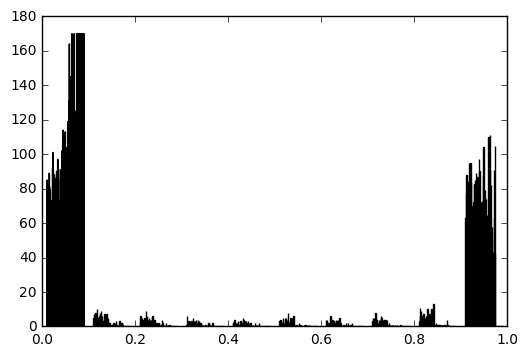

In [8]:
plt.hist(joint_layer)

In [9]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))

([<matplotlib.axis.XTick at 0x1211743d0>,
 <a list of 3 Text xticklabel objects>)

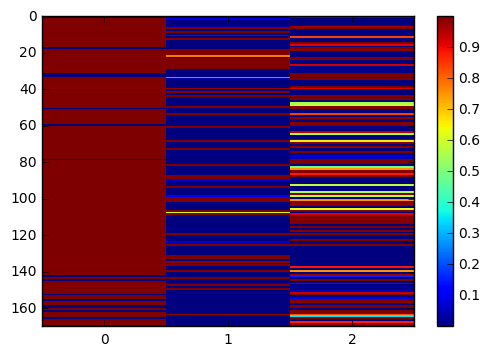

In [10]:
plt.imshow(top_output, interpolation='none',extent=[0,3,170,0])
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([  16.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  154.]),
  array([ 125.,    1.,    0.,    0.,    0.,    0.,    1.,    2.,    0.,   41.]),
  array([ 87.,   1.,   0.,   1.,   1.,   6.,   2.,   3.,   6.,  63.])],
 array([  4.98764230e-09,   9.99999330e-02,   1.99999861e-01,
          2.99999789e-01,   3.99999717e-01,   4.99999645e-01,
          5.99999573e-01,   6.99999501e-01,   7.99999429e-01,
          8.99999357e-01,   9.99999285e-01]),
 <a list of 3 Lists of Patches objects>)

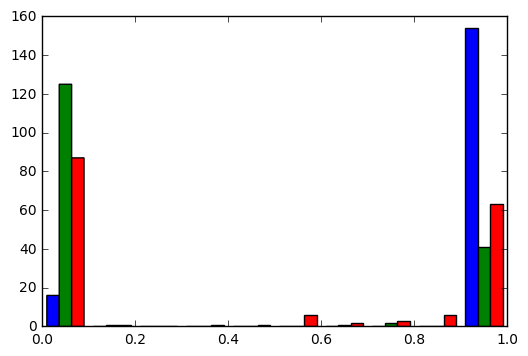

In [11]:
plt.hist(top_output)

In [12]:
top_dbn_rbm1 = dbn_dict['top'].rbm_layers[1]

In [13]:
reload(rbm)
middle_layer = top_dbn_rbm1.reverse_sampling(1,theano.shared(top_output,borrow=True))

 ... computing sample 0


(array([ 1550.,   338.,   241.,   501.,   276.,    80.,   288.,    83.,
          329.,   394.]),
 array([  1.65679943e-04,   9.94716277e-02,   1.98777575e-01,
          2.98083523e-01,   3.97389471e-01,   4.96695419e-01,
          5.96001366e-01,   6.95307314e-01,   7.94613262e-01,
          8.93919210e-01,   9.93225157e-01]),
 <a list of 10 Patch objects>)

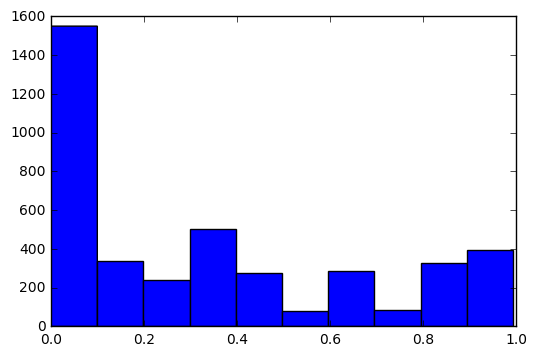

In [14]:
plt.hist(middle_layer)

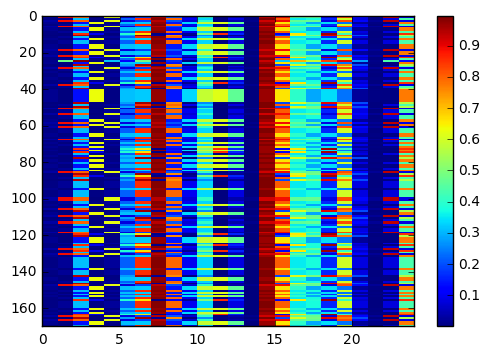

In [15]:
plt.imshow(middle_layer[0], interpolation='none',extent=[0,24,170,0])
plt.axis('tight')
plt.colorbar()

In [16]:
top_dbn_rbm0 = dbn_dict['top'].rbm_layers[0]

In [17]:
sampled_joint_layer = top_dbn_rbm0.reverse_sampling(1,theano.shared(middle_layer[0],borrow=True))

 ... computing sample 0


([array([  0.,   0.,   0.,   4.,   0.,   0.,  35.,   8.,  34.,  89.]),
  array([  0.,   0.,   0.,   0.,   2.,   0.,   5.,   4.,  75.,  84.]),
  array([  0.,   1.,   2.,   7.,   0.,   0.,  83.,  51.,   8.,  18.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    2.,    7.,   18.,  143.]),
  array([  1.,   0.,   0.,   0.,   0.,   0.,  11.,   0.,  67.,  91.]),
  array([ 70.,   1.,  13.,  69.,  11.,   4.,   0.,   0.,   1.,   1.]),
  array([ 153.,   17.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 13.,  77.,   5.,   0.,   3.,   5.,  39.,   8.,  17.,   3.]),
  array([  2.,   0.,  15.,   1.,   0.,   0.,  38.,   1.,  14.,  99.]),
  array([  1.,  13.,  82.,   4.,   2.,  11.,  38.,  19.,   0.,   0.]),
  array([  0.,  16.,   0.,   0.,  35.,   1.,   7.,   8.,  10.,  93.]),
  array([ 62.,  86.,  14.,   2.,   5.,   1.,   0.,   0.,   0.,   0.]),
  array([ 158.,    8.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
  array([   0.,    0.,    0.,    0.,    0.,    

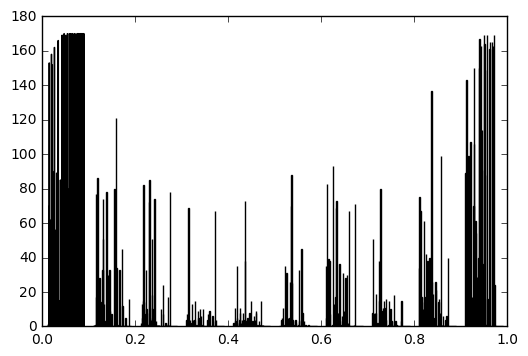

In [18]:
plt.hist(sampled_joint_layer[0])

(-0.5, 99.5, 169.5, -0.5)

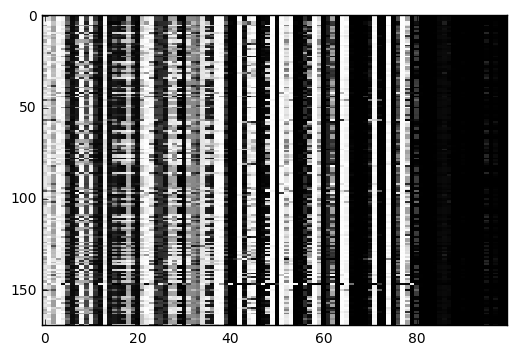

In [19]:
plt.imshow(sampled_joint_layer[0], cmap='gray',interpolation='none')
plt.axis('tight')

In [22]:
sm_dbn_rbm1 = dbn_dict['SM'].rbm_layers[1]

In [29]:
sm_top_layer = sampled_joint_layer[0][:,-20:]

In [31]:
sm_mid_layer = sm_dbn_rbm1.reverse_sampling(1,theano.shared(sm_top_layer,borrow=True))

 ... computing sample 0


In [32]:
sm_dbn_rbm0 = dbn_dict['SM'].rbm_layers[0]

In [36]:
sm_vis_layer = sm_dbn_rbm0.reverse_sampling(1,theano.shared(sm_mid_layer[0],borrow=True))

 ... computing sample 0


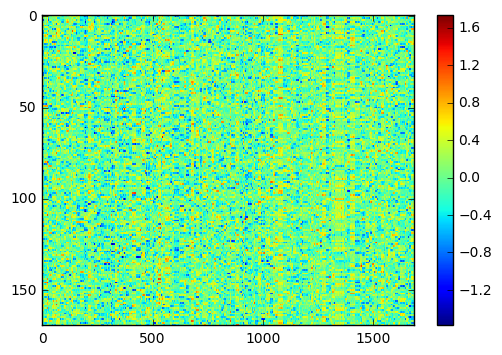

In [49]:
plt.imshow(sm_vis_layer[0],interpolation='none')
plt.axis('tight')
plt.colorbar()

In [51]:
sm_set, _ = MDBN.load_n_preprocess_data(datafiles['SM'],datadir=data_dir,holdout=0,repeats=1)

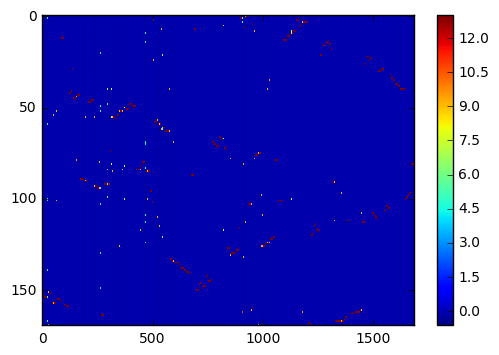

In [52]:
plt.imshow(sm_set.get_value(),interpolation='none')
plt.axis('tight')
plt.colorbar()

In [61]:
from scipy import stats
np.mean(sm_set.get_value(),axis=0)

array([ -4.55800233e-08,  -4.55800233e-08,  -4.55800233e-08, ...,
         4.20738679e-08,   4.20738679e-08,   4.20738679e-08], dtype=float32)

In [64]:
np.min(sm_set.get_value())

-0.63636369